In [ ]:
!pip install torch torch-geometric scikit-learn pandas networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
import numpy
print(numpy.__version__)

2.0.2


In [ ]:
import torch
print(torch.__version__)

2.6.0+cu124


In [ ]:
# Torch-scatter and torch-sparse compatible with torch==2.6.0+cu124
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.6.0+cu124.html -q
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.6.0+cu124.html -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 35.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import os  # Make sure to import the os module

benign_data_dir = "/content/drive/My Drive/ids/iot/benign/"
mirai_data_dir = "/content/drive/My Drive/ids/iot/mirai/"

benign_files = [f"{benign_data_dir}{file}" for file in os.listdir(benign_data_dir) if file.endswith(".csv")]
mirai_files = [f"{mirai_data_dir}{file}" for file in os.listdir(mirai_data_dir) if file.endswith(".csv")]

benign_dfs = [pd.read_csv(file) for file in benign_files]
mirai_dfs = [pd.read_csv(file) for file in mirai_files]

benign_df = pd.concat(benign_dfs, ignore_index=True)
mirai_df = pd.concat(mirai_dfs, ignore_index=True)

print(f"Number of benign samples: {len(benign_df)}")
print(f"Number of Mirai samples: {len(mirai_df)}")

Number of benign samples: 84526
Number of Mirai samples: 33758


In [ ]:
benign_df['label'] = 0  # 0 for benign
mirai_df['label'] = 1   # 1 for Mirai

In [ ]:
df = pd.concat([benign_df, mirai_df], ignore_index=True)

In [ ]:
print("Columns in benign_df:")
print(benign_df.columns)
print("\nColumns in mirai_df:")
print(mirai_df.columns)

# Combine the benign and mirai dataframes into a single dataframe named df
df = pd.concat([benign_df, mirai_df], ignore_index=True)

print("\nColumns in combined df:")
print(df.columns)

Columns in benign_df:
Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Le

In [ ]:
import numpy as np

# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

print("Number of infinite values in df:")
print(np.isinf(df[numerical_cols]).sum())
print("\nNumber of NaN values in df:")
print(df[numerical_cols].isna().sum())

Number of infinite values in df:
Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
label               0
Length: 80, dtype: int64

Number of NaN values in df:
Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
label               0
Length: 80, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns (MATCH ACTUAL COLUMN NAMES)
numerical_cols = ['Flow Duration',
                  'Total Fwd Packet',
                  'Total Bwd packets',
                  'Total Length of Fwd Packet',
                  'Total Length of Bwd Packet',
                  'Fwd Packet Length Max',
                  'Fwd Packet Length Min',
                  'Fwd Packet Length Mean',
                  'Fwd Packet Length Std',
                  'Bwd Packet Length Max',
                  'Bwd Packet Length Min',
                  'Bwd Packet Length Mean',
                  'Bwd Packet Length Std',
                  'Flow Bytes/s',
                  'Flow Packets/s'] # Add all the numerical columns you want to use

categorical_cols = ['Protocol'] # Use the correct column name

# Combine the benign and mirai dataframes before preprocessing
df = pd.concat([benign_df, mirai_df], ignore_index=True)

# Replace infinite values with NaN
df[numerical_cols] = df[numerical_cols].replace([np.inf, -np.inf], np.nan)

# Impute missing values (using median for numerical columns)
imputer_numerical = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_numerical.fit_transform(df[numerical_cols])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns
)

# Apply the preprocessing
df_processed = pd.DataFrame(preprocessor.fit_transform(df))

# Get the names of the new columns after one-hot encoding
ohe_categories = preprocessor.named_transformers_['cat'].categories_[0]
new_cat_cols = [f'Protocol_{cat}' for cat in ohe_categories]

# Assign column names to the processed DataFrame
feature_names = numerical_cols + new_cat_cols + [col for col in df.columns if col not in numerical_cols + categorical_cols]
df_processed.columns = feature_names

# Drop the original categorical column
df.drop(columns=categorical_cols, inplace=True)

print("Processed DataFrame shape:", df_processed.shape)
print("Processed DataFrame head:")
print(df_processed.head())

Processed DataFrame shape: (118284, 87)
Processed DataFrame head:
  Flow Duration Total Fwd Packet Total Bwd packets Total Length of Fwd Packet  \
0     -0.608945        -0.032014          0.378796                   0.468405   
1     -0.593817        -0.041258         -0.020484                  -0.040247   
2     -0.611466        -0.044836         -0.037423                  -0.053652   
3     -0.599494        -0.008756          0.223924                  -0.051197   
4     -0.602297        -0.042152         -0.027744                  -0.048647   

  Total Length of Bwd Packet Fwd Packet Length Max Fwd Packet Length Min  \
0                  -0.012989              3.676065             -0.540546   
1                   0.013221              1.210733             -0.540546   
2                  -0.012989             -0.198538             -0.540546   
3                   1.211312             -0.013906             -0.540546   
4                   0.003557                 0.218             -0.5

In [ ]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 44.2 MB/s eta 0:00:00


In [ ]:
print(df_processed.dtypes)

Flow Duration                 object
Total Fwd Packet              object
Total Bwd packets             object
Total Length of Fwd Packet    object
Total Length of Bwd Packet    object
                               ...  
Idle Std                      object
Idle Max                      object
Idle Min                      object
Label                         object
label                         object
Length: 87, dtype: object


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from torch_geometric.data import Data
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# --- 1. Dummy Data (REPLACE WITH YOUR ACTUAL df_processed) ---
# This simulates your preprocessed DataFrame.
# In a real scenario, df_processed would be loaded from your CSV/database
# and would have undergone feature engineering.
print("Creating dummy df_processed for demonstration purposes...")
num_samples = 5000 # Let's simulate a moderately sized dataset
num_unique_ips = 100 # Number of unique IPs for connection logic

# Generate dummy data
data = {
    'Flow ID': range(num_samples),
    'Src IP': np.random.choice([f'192.168.1.{i}' for i in range(num_unique_ips)], size=num_samples),
    'Dst IP': np.random.choice([f'192.168.1.{i}' for i in range(num_unique_ips)], size=num_samples),
    'Timestamp': pd.to_datetime(pd.date_range(start='2023-01-01', periods=num_samples, freq='s')),
    'PacketLength': np.random.randint(50, 1500, num_samples),
    'Duration': np.random.rand(num_samples) * 100,
    'Protocol': np.random.choice([6, 17], size=num_samples), # TCP (6) or UDP (17)
    'label': np.random.randint(0, 2, num_samples) # Binary classification label (e.g., 0: normal, 1: malware/anomaly)
}
df_processed = pd.DataFrame(data)

# Ensure 'label' is integer type
df_processed['label'] = df_processed['label'].astype(int)

print(f"Dummy df_processed created with {len(df_processed)} rows and {len(df_processed.columns)} columns.")
print(df_processed.head())
print(f"Unique labels: {df_processed['label'].unique()}")
print(f"Label distribution:\n{df_processed['label'].value_counts()}")


# --- 2. Extract Features (x) and Labels (y) ---
label_col_name = 'label'
# Columns to exclude from features (e.g., identifiers, original string labels)
cols_to_exclude_from_features = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', label_col_name]

feature_cols = [col for col in df_processed.columns if col not in cols_to_exclude_from_features]

# Convert features to PyTorch tensor (float32 is standard for model inputs)
x = torch.tensor(df_processed[feature_cols].values.astype(np.float32), dtype=torch.float)

# Convert labels to PyTorch tensor (long is required for classification labels)
y = torch.tensor(df_processed[label_col_name].values, dtype=torch.long)

print(f"\nFeatures (x) shape: {x.shape}")
print(f"Labels (y) shape: {y.shape}")


# --- 3. Graph Construction (CRITICAL FOR MEMORY EFFICIENCY) ---
# This is where you define the meaningful connections (edges) between your nodes.
# Instead of a dense graph, we build a sparse graph based on shared attributes.
# Example: Connect flows that share the same Source IP or Destination IP.

print("\nConstructing graph edges based on shared Source/Destination IPs...")
edges = []
num_nodes = x.size(0)

# Create a mapping from IP address to a list of node indices (Flow IDs) that use that IP
ip_to_nodes = {}

# Populate the mapping
for i, row_data in df_processed.iterrows():
    src_ip = row_data['Src IP']
    dst_ip = row_data['Dst IP']

    # Add current node index to lists for both source and destination IPs
    if src_ip not in ip_to_nodes:
        ip_to_nodes[src_ip] = []
    ip_to_nodes[src_ip].append(i)

    if dst_ip not in ip_to_nodes:
        ip_to_nodes[dst_ip] = []
    ip_to_nodes[dst_ip].append(i)

# Now, create edges. For each IP, connect all flows that use it.
# This creates small "cliques" or star-like structures around each IP.
# For very large `nodes_list`, you might want to connect only adjacent nodes in time,
# or use a bipartite graph approach (flows connected to IPs, IPs connected to flows).
for ip, nodes_list in ip_to_nodes.items():
    if len(nodes_list) > 1:
        # Connect each node in the list to every other node in the list (forms a clique for that IP)
        # This can still generate many edges if an IP is involved in many flows.
        # For extremely large datasets, consider connecting only adjacent nodes in `nodes_list`
        # or connecting all nodes to a dummy 'IP node' for a bipartite graph.
        for i in range(len(nodes_list)):
            for j in range(i + 1, len(nodes_list)):
                node1 = nodes_list[i]
                node2 = nodes_list[j]
                edges.append([node1, node2])
                edges.append([node2, node1]) # Add reverse edge for undirected graph

# Convert the list of edges to a PyTorch tensor
if edges:
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
else:
    edge_index = torch.empty((2, 0), dtype=torch.long) # Handle case with no edges

print(f"Generated edge_index shape: {edge_index.shape} (Number of edges: {edge_index.shape[1]})")
# Note: The number of edges will depend heavily on the distribution of IPs in your dummy data.
# For real data, this can still be large but manageable, unlike num_nodes * num_nodes.


# --- 4. Create Train/Test Masks (using sklearn for robust splitting) ---
print("\nSplitting data into training and test sets using stratified split...")
if num_nodes > 0:
    indices = np.arange(num_nodes)
    train_indices, test_indices = train_test_split(
        indices,
        test_size=0.2, # 20% for testing
        random_state=42, # For reproducibility
        stratify=y.cpu().numpy() # Ensures similar class distribution in both sets
    )

    train_mask = torch.zeros(num_nodes, dtype=torch.bool)
    test_mask = torch.zeros(num_nodes, dtype=torch.bool)
    train_mask[train_indices] = True
    test_mask[test_indices] = True
else:
    train_mask = torch.zeros(0, dtype=torch.bool)
    test_mask = torch.zeros(0, dtype=torch.bool)


# --- 5. Create the PyTorch Geometric Data object ---
data = Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask, test_mask=test_mask)

print("\nPyG Data object created:")
print(data)
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of features: {data.num_features}")
print(f"Number of classes: {data.y.unique().size(0)}")
print(f"Number of training samples: {data.train_mask.sum()}")
print(f"Number of test samples: {data.test_mask.sum()}")


# --- 6. GraphSAGE Model Definition ---
class GraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGE, self).__init__()
        # SAGEConv is a GraphSAGE layer
        # in_channels: dimension of input node features
        # hidden_channels: dimension of output features for the first layer
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        # out_channels: dimension of final output features (number of classes for classification)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        # First GraphSAGE layer
        x = self.conv1(x, edge_index)
        # Apply ReLU activation function
        x = F.relu(x)
        # Apply dropout for regularization during training
        x = F.dropout(x, p=0.5, training=self.training)
        # Second GraphSAGE layer
        x = self.conv2(x, edge_index)
        return x

# --- 7. Training and Testing Functions ---
def train(model, data, optimizer, criterion):
    model.train() # Set the model to training mode
    optimizer.zero_grad() # Clear gradients from previous step

    # Perform a forward pass
    out = model(data.x, data.edge_index)

    # Calculate loss only on training nodes
    loss = criterion(out[data.train_mask], data.y[data.train_mask])

    loss.backward() # Backpropagate the loss
    optimizer.step() # Update model parameters
    return loss.item()

def test(model, data):
    model.eval() # Set the model to evaluation mode

    # Perform a forward pass
    out = model(data.x, data.edge_index)

    # Get predicted labels by taking the argmax of the output logits
    predicted_labels = out.argmax(dim=1)
    true_labels = data.y

    # Evaluate performance on training set
    y_true_train = true_labels[data.train_mask].cpu().numpy()
    y_pred_train = predicted_labels[data.train_mask].cpu().numpy()
    print("\n--- Training Set Classification Report ---")
    if len(y_true_train) > 0:
        print(classification_report(y_true_train, y_pred_train, zero_division=0))
    else:
        print("No samples in training set mask.")

    # Evaluate performance on test set
    y_true_test = true_labels[data.test_mask].cpu().numpy()
    y_pred_test = predicted_labels[data.test_mask].cpu().numpy()
    print("\n--- Test Set Classification Report ---")
    if len(y_true_test) > 0:
        print(classification_report(y_true_test, y_pred_test, zero_division=0))
    else:
        print("No samples in test set mask.")


# --- 8. Model Initialization and Training Loop ---
# Determine input and output channels for the model
in_channels = data.num_features
out_channels = data.y.unique().size(0) # Number of unique classes

# Basic checks before initializing model
if in_channels == 0:
    print("Error: No features detected. Please ensure 'feature_cols' are correctly identified.")
elif out_channels < 2:
    print(f"Error: Only {out_channels} class(es) detected. Need at least 2 for classification.")
elif data.num_nodes == 0:
    print("Error: No nodes in the graph. Cannot train model.")
else:
    # Initialize the GraphSAGE model
    model = GraphSAGE(in_channels=in_channels, hidden_channels=128, out_channels=out_channels)

    # Define optimizer (Adam is a common choice)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # Define loss function (CrossEntropyLoss for multi-class classification)
    criterion = torch.nn.CrossEntropyLoss()

    print("\nStarting training...")
    for epoch in range(1, 101): # Train for 100 epochs
        loss = train(model, data, optimizer, criterion)
        if epoch % 10 == 0:
            print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

    print("\nTraining complete. Running final evaluation...")
    test(model, data)



/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(


Creating dummy df_processed for demonstration purposes...
Dummy df_processed created with 5000 rows and 8 columns.
   Flow ID        Src IP        Dst IP           Timestamp  PacketLength  \
0        0  192.168.1.72  192.168.1.26 2023-01-01 00:00:00          1335   
1        1  192.168.1.47  192.168.1.55 2023-01-01 00:00:01           473   
2        2  192.168.1.38  192.168.1.28 2023-01-01 00:00:02           375   
3        3  192.168.1.17  192.168.1.77 2023-01-01 00:00:03          1369   
4        4  192.168.1.95   192.168.1.6 2023-01-01 00:00:04           899   

    Duration  Protocol  label  
0  87.378790         6      0  
1   1.189068        17      0  
2  50.377009         6      1  
3  14.454529         6      0  
4  35.512455         6      1  
Unique labels: [0 1]
Label distribution:
label
1    2510
0    2490
Name: count, dtype: int64

Features (x) shape: torch.Size([5000, 3])
Labels (y) shape: torch.Size([5000])

Constructing graph edges based on shared Source/Destination IP

In [ ]:
import pandas as pd
import os
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from torch_geometric.data import Data
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from datetime import timedelta # Import timedelta for temporal connections
from google.colab import drive

# Mount Google Drive (ensure this is run at the beginning of your Colab session)
drive.mount('/content/drive')

# --- 1. Data Loading ---
print("--- Step 1: Data Loading ---")
benign_data_dir = "/content/drive/My Drive/ids/iot/benign/"
mirai_data_dir = "/content/drive/My Drive/ids/iot/mirai/"

benign_files = [f"{benign_data_dir}{file}" for file in os.listdir(benign_data_dir) if file.endswith(".csv")]
mirai_files = [f"{mirai_data_dir}{file}" for file in os.listdir(mirai_data_dir) if file.endswith(".csv")]

print(f"Found {len(benign_files)} benign files and {len(mirai_files)} mirai files.")

# Load and concatenate benign data
benign_dfs = []
for file in benign_files:
    try:
        benign_dfs.append(pd.read_csv(file))
    except Exception as e:
        print(f"Error loading benign file {file}: {e}")
benign_df = pd.concat(benign_dfs, ignore_index=True)

# Load and concatenate mirai data
mirai_dfs = []
for file in mirai_files:
    try:
        mirai_dfs.append(pd.read_csv(file))
    except Exception as e:
        print(f"Error loading mirai file {file}: {e}")
mirai_df = pd.concat(mirai_dfs, ignore_index=True)

print(f"Number of benign samples: {len(benign_df)}")
print(f"Number of Mirai samples: {len(mirai_df)}")

# --- 2. Labeling and Initial Combined DataFrame ---
print("\n--- Step 2: Labeling and Combining DataFrames ---")
benign_df['label'] = 0  # 0 for benign
mirai_df['label'] = 1   # 1 for Mirai

# Combine the benign and mirai dataframes into a single dataframe named df
df = pd.concat([benign_df, mirai_df], ignore_index=True)

print("Combined DataFrame shape:", df.shape)
print("Combined DataFrame head:")
print(df.head())
print("Combined DataFrame label distribution:\n", df['label'].value_counts())

# --- 3. Data Type Conversion and Handling Missing/Infinite Values ---
# This is crucial to ensure all intended numerical columns are actually numbers.
print("\n--- Step 3: Data Type Conversion and Handling Missing/Infinite Values ---")

# Define all columns that should be numerical (excluding IDs, Timestamp, and labels)
all_potential_numerical_cols = [
    'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
    'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
    'Fwd Packet Length Max', 'Fwd Packet Length Min',
    'Fwd Packet Length Mean', 'Fwd Packet Length Std',
    'Bwd Packet Length Max', 'Bwd Packet Length Min',
    'Bwd Packet Length Mean', 'Bwd Packet Length Std',
    'Flow Bytes/s', 'Flow Packets/s',
    'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', # Added these based on your full column list
    'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
    'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
    'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
    'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
    'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
    'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'CWR Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
    'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg',
    'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg',
    'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg',
    'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
    'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
    'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
    'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Ensure only columns present in df are selected
numerical_cols_to_process = [col for col in all_potential_numerical_cols if col in df.columns]

# Convert columns to numeric, coercing errors to NaN
for col in numerical_cols_to_process:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace infinite values with NaN (important after conversion)
df[numerical_cols_to_process] = df[numerical_cols_to_process].replace([np.inf, -np.inf], np.nan)

print("Number of infinite values after conversion:")
print(np.isinf(df[numerical_cols_to_process]).sum().sum()) # Sum all infs across columns
print("\nNumber of NaN values after conversion:")
print(df[numerical_cols_to_process].isna().sum().sum()) # Sum all NaNs across columns

# Impute missing values (using median for numerical columns)
imputer_numerical = SimpleImputer(strategy='median')
df[numerical_cols_to_process] = imputer_numerical.fit_transform(df[numerical_cols_to_process])

print("\nData types after numerical conversion and imputation:")
print(df[numerical_cols_to_process].dtypes.value_counts()) # Should mostly be float64

# --- 4. Preprocessing with ColumnTransformer (Revised) ---
print("\n--- Step 4: Preprocessing with ColumnTransformer (Revised) ---")

# Define categorical columns (Corrected NameError)
categorical_cols_to_process = ['Protocol'] # Assuming 'Protocol' is your categorical column

# Identify columns that should be passed through (IDs, IPs, Timestamp, original Label)
# These are NOT features for the GNN, but needed for graph construction or later.
passthrough_cols_for_graph = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label', 'label']
passthrough_cols_for_graph = [col for col in passthrough_cols_for_graph if col in df.columns]

# Define the preprocessor - ONLY transform numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_to_process),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_to_process)
    ],
    remainder='drop' # Crucial: Drop other columns from the transformed array
)

# Apply the preprocessing - this array ONLY contains numerical and OHE features
transformed_features_array = preprocessor.fit_transform(df)

# Create df_processed for features only
# Ensure it's float32 from the start
df_processed_features = pd.DataFrame(transformed_features_array.astype(np.float32))

# Get names of transformed numerical features
transformed_numerical_cols = numerical_cols_to_process

# Get names of one-hot encoded categorical features
ohe_feature_names = []
if 'cat' in preprocessor.named_transformers_ and hasattr(preprocessor.named_transformers_['cat'], 'categories_'):
    # Iterate through categories for each categorical column
    for i, col_name in enumerate(categorical_cols_to_process):
        if i < len(preprocessor.named_transformers_['cat'].categories_):
            categories = preprocessor.named_transformers_['cat'].categories_[i]
            ohe_feature_names.extend([f"{col_name}_{cat}" for cat in categories])
        else:
            print(f"Warning: Could not get categories for {col_name}. Skipping one-hot encoded column naming for this feature.")
else:
    print("Warning: 'cat' transformer or its 'categories_' attribute not found. One-hot encoded column naming skipped.")

# Assign column names to the features DataFrame
df_processed_features.columns = transformed_numerical_cols + ohe_feature_names

# --- 5. Combine Processed Features with Necessary Passthrough Columns (Revised) ---
print("\n--- Step 5: Combining Processed Features with Passthrough Columns ---")

# Create a new df_processed that combines features and the original ID/IP/Timestamp/Label columns
df_processed = pd.concat([
    df_processed_features,
    df[passthrough_cols_for_graph].reset_index(drop=True) # Ensure indices align
], axis=1)

# Ensure 'label' column is correctly identified and is integer type
if 'label' in df_processed.columns:
    # Coerce to numeric first, then to int, handling any potential non-numeric values
    df_processed['label'] = pd.to_numeric(df_processed['label'], errors='coerce').fillna(-1).astype(int) # Fillna with -1 or another indicator if needed
    # After this, remove rows where label became -1 due to coercion
    df_processed = df_processed[df_processed['label'] != -1]
else:
    print("Error: 'label' column not found in df_processed. Check original column names or passthrough_cols_for_graph.")

# Drop the original 'Label' column if it exists and is different from our 'label'
if 'Label' in df_processed.columns and 'Label' != 'label':
    df_processed = df_processed.drop(columns=['Label'])

# --- IMPORTANT: Convert Timestamp to datetime objects for graph construction ---
if 'Timestamp' in df_processed.columns:
    df_processed['Timestamp'] = pd.to_datetime(df_processed['Timestamp'], errors='coerce')
    if df_processed['Timestamp'].isnull().any():
        print("Warning: Some Timestamps could not be converted to datetime. These rows might be excluded from temporal graph connections.")
else:
    print("Error: 'Timestamp' column not found in df_processed. Temporal graph construction will not be possible.")


print("Processed DataFrame shape:", df_processed.shape)
print("Processed DataFrame head:")
print(df_processed.head())
print("Processed DataFrame dtypes (should be mostly float/int for features, object for IDs/IPs):")
print(df_processed.dtypes.value_counts()) # Check dtypes again


# --- 6. Extract Features (x) and Labels (y) for PyG ---
print("\n--- Step 6: Extracting Features (x) and Labels (y) for PyG ---")
label_col_name = 'label'
# Columns to exclude from features (IDs, Timestamps, and labels)
cols_to_exclude_from_features_pyg = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', label_col_name]

feature_cols = [col for col in df_processed.columns if col not in cols_to_exclude_from_features_pyg]

# Convert features to PyTorch tensor (float32 is standard for model inputs)
x = torch.tensor(df_processed[feature_cols].values.astype(np.float32), dtype=torch.float)

# Convert labels to PyTorch tensor (long is required for classification labels)
y = torch.tensor(df_processed[label_col_name].values, dtype=torch.long)

print(f"Features (x) shape: {x.shape}")
print(f"Labels (y) shape: {y.shape}")


# --- 7. Graph Construction (ULTRA Memory-Efficient: Sequential Connections per (Src IP, Dst IP) pair) ---
print("\n--- Step 7: Graph Construction (Sequential Connections per (Src IP, Dst IP) pair) ---")
edges = []
num_nodes = x.size(0)

# Create a temporary DataFrame for easier sorting and grouping
# This will be used to get the original indices for edge creation
df_temp_graph = df_processed[['Src IP', 'Dst IP', 'Timestamp']].copy()
df_temp_graph['original_index'] = df_processed.index

# Drop rows with NaT in Timestamp for sorting, as NaT cannot be sorted
df_temp_graph.dropna(subset=['Timestamp'], inplace=True)

# Sort by Src IP, Dst IP, and Timestamp to ensure temporal order within each unique flow path
df_temp_graph = df_temp_graph.sort_values(by=['Src IP', 'Dst IP', 'Timestamp']).reset_index(drop=True)

# Iterate through groups of (Src IP, Dst IP) pairs
# This will create a series of small, sequential graphs
for (src_ip, dst_ip), group in df_temp_graph.groupby(['Src IP', 'Dst IP']):
    node_indices = group['original_index'].tolist()

    # Connect consecutive flows in this sequence
    for i in range(len(node_indices) - 1):
        node1 = node_indices[i]
        node2 = node_indices[i+1]
        edges.append([node1, node2])
        edges.append([node2, node1]) # Add reverse edge for undirected graph

# Convert the list of edges to a PyTorch tensor
if edges:
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
else:
    edge_index = torch.empty((2, 0), dtype=torch.long) # Handle case with no edges

print(f"Generated edge_index shape: {edge_index.shape} (Number of edges: {edge_index.shape[1]})")


# --- 8. Create Train/Test Masks (using sklearn for robust splitting) ---
print("\n--- Step 8: Creating Train/Test Masks ---")
if num_nodes > 0:
    indices = np.arange(num_nodes)
    train_indices, test_indices = train_test_split(
        indices,
        test_size=0.2, # 20% for testing
        random_state=42, # For reproducibility
        stratify=y.cpu().numpy() # Ensures similar class distribution in both sets
    )

    train_mask = torch.zeros(num_nodes, dtype=torch.bool)
    test_mask = torch.zeros(num_nodes, dtype=torch.bool)
    train_mask[train_indices] = True
    test_mask[test_indices] = True
else:
    train_mask = torch.zeros(0, dtype=torch.bool)
    test_mask = torch.zeros(0, dtype=torch.bool)

print(f"Number of training samples: {train_mask.sum()}")
print(f"Number of test samples: {test_mask.sum()}")


# --- 9. Create the PyTorch Geometric Data object ---
print("\n--- Step 9: Creating PyTorch Geometric Data object ---")
data = Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask, test_mask=test_mask)

print("\nPyG Data object created:")
print(data)
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of features: {data.num_features}")
print(f"Number of classes: {data.y.unique().size(0)}")


# --- 10. GraphSAGE Model Definition ---
print("\n--- Step 10: GraphSAGE Model Definition ---")
class GraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# --- 11. Training and Testing Functions ---
print("\n--- Step 11: Training and Testing Functions Defined ---")
def train(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test(model, data):
    model.eval()
    out = model(data.x, data.edge_index)
    predicted_labels = out.argmax(dim=1)
    true_labels = data.y

    y_true_train = true_labels[data.train_mask].cpu().numpy()
    y_pred_train = predicted_labels[data.train_mask].cpu().numpy()
    print("\n--- Training Set Classification Report ---")
    if len(y_true_train) > 0:
        print(classification_report(y_true_train, y_pred_train, zero_division=0))
    else:
        print("No samples in training set mask.")

    y_true_test = true_labels[data.test_mask].cpu().numpy()
    y_pred_test = predicted_labels[data.test_mask].cpu().numpy()
    print("\n--- Test Set Classification Report ---")
    if len(y_true_test) > 0:
        print(classification_report(y_true_test, y_pred_test, zero_division=0))
    else:
        print("No samples in test set mask.")


# --- 12. Model Initialization and Training Loop ---
print("\n--- Step 12: Model Initialization and Training Loop ---")
in_channels = data.num_features
out_channels = data.y.unique().size(0)

if in_channels == 0:
    print("Error: No features detected. Please check 'feature_cols'.")
elif out_channels < 2:
    print(f"Error: Only {out_channels} class(es) detected. Need at least 2 for classification.")
elif data.num_nodes == 0:
    print("Error: No nodes in the graph. Cannot train model.")
else:
    model = GraphSAGE(in_channels=in_channels, hidden_channels=128, out_channels=out_channels)

    # --- Addressing Class Imbalance: Calculate Class Weights ---
    class_counts = df['label'].value_counts().sort_index()
    total_samples = class_counts.sum()

    # Calculate inverse class weights: N_total / (num_classes * N_k)
    # This gives higher weight to the minority class
    class_weights = total_samples / (len(class_counts) * class_counts.values)
    weights_tensor = torch.tensor(class_weights, dtype=torch.float)

    print(f"\nCalculated class weights: {weights_tensor.tolist()}")

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    criterion = torch.nn.CrossEntropyLoss(weight=weights_tensor) # Use weighted loss

    print("\nStarting training...")
    for epoch in range(1, 101):
        loss = train(model, data, optimizer, criterion)
        if epoch % 10 == 0:
            print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

    print("\nTraining complete. Running final evaluation...")
    test(model, data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Step 1: Data Loading ---
Found 1 benign files and 5 mirai files.
Number of benign samples: 84526
Number of Mirai samples: 33758

--- Step 2: Labeling and Combining DataFrames ---
Combined DataFrame shape: (118284, 85)
Combined DataFrame head:
                                     Flow ID           Src IP  Src Port  \
0    23.78.206.51-192.168.137.253-80-40940-6     23.78.206.51        80   
1  192.168.137.253-54.148.103.72-51030-443-6  192.168.137.253     51030   
2  192.168.137.253-54.148.103.72-51030-443-6  192.168.137.253     51030   
3    192.168.137.253-23.78.206.51-40944-80-6  192.168.137.253     40944   
4   192.168.137.187-18.207.33.55-39741-443-6  192.168.137.187     39741   

            Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0  192.168.137.253     40940         6  07/10/2022 11:30:28 PM         114733   
1    54.148

<ipython-input-22-1c9bc5d7396a>:186: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_processed['Timestamp'] = pd.to_datetime(df_processed['Timestamp'], errors='coerce')


Processed DataFrame shape: (118284, 84)
Processed DataFrame head:
   Flow Duration  Total Fwd Packet  Total Bwd packets  \
0      -0.608945         -0.032014           0.378796   
1      -0.593817         -0.041258          -0.020484   
2      -0.611466         -0.044836          -0.037423   
3      -0.599494         -0.008756           0.223924   
4      -0.602297         -0.042152          -0.027744   

   Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                    0.468405                   -0.012989   
1                   -0.040247                    0.013221   
2                   -0.053652                   -0.012989   
3                   -0.051197                    1.211312   
4                   -0.048647                    0.003557   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0               3.676065              -0.540546               15.059868   
1               1.210733              -0.540546                0.812521   

In [ ]:
import pandas as pd
import os
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from torch_geometric.data import Data
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from datetime import timedelta
import matplotlib.pyplot as plt
import gc # Import garbage collector

# --- 1. Data Loading ---
print("--- Step 1: Data Loading ---")
benign_data_dir = "/content/drive/My Drive/ids/iot/benign/"
mirai_data_dir = "/content/drive/My Drive/ids/iot/mirai/"

benign_files = [f"{benign_data_dir}{file}" for file in os.listdir(benign_data_dir) if file.endswith(".csv")]
mirai_files = [f"{mirai_data_dir}{file}" for file in os.listdir(mirai_data_dir) if file.endswith(".csv")]

print(f"Found {len(benign_files)} benign files and {len(mirai_files)} mirai files.")

# Load and concatenate benign data
benign_dfs = []
for file in benign_files:
    try:
        benign_dfs.append(pd.read_csv(file))
    except Exception as e:
        print(f"Error loading benign file {file}: {e}")
benign_df = pd.concat(benign_dfs, ignore_index=True)

# Load and concatenate mirai data
mirai_dfs = []
for file in mirai_files:
    try:
        mirai_dfs.append(pd.read_csv(file))
    except Exception as e:
        print(f"Error loading mirai file {file}: {e}")
mirai_df = pd.concat(mirai_dfs, ignore_index=True)

print(f"Number of benign samples: {len(benign_df)}")
print(f"Number of Mirai samples: {len(mirai_df)}")

# --- 2. Labeling and Initial Combined DataFrame ---
print("\n--- Step 2: Labeling and Combining DataFrames ---")
benign_df['label'] = 0
mirai_df['label'] = 1

df = pd.concat([benign_df, mirai_df], ignore_index=True)

print("Combined DataFrame shape:", df.shape)
print("Combined DataFrame head:")
print(df.head())
print("Combined DataFrame label distribution:\n", df['label'].value_counts())

# --- 3. Data Type Conversion and Handling Missing/Infinite Values ---
print("\n--- Step 3: Data Type Conversion and Handling Missing/Infinite Values ---")

all_potential_numerical_cols = [
    'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
    'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
    'Fwd Packet Length Max', 'Fwd Packet Length Min',
    'Fwd Packet Length Mean', 'Fwd Packet Length Std',
    'Bwd Packet Length Max', 'Bwd Packet Length Min',
    'Bwd Packet Length Mean', 'Bwd Packet Length Std',
    'Flow Bytes/s', 'Flow Packets/s',
    'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
    'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
    'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
    'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
    'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
    'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'CWR Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
    'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg',
    'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg',
    'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg',
    'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
    'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
    'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
    'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

numerical_cols_to_process = [col for col in all_potential_numerical_cols if col in df.columns]

for col in numerical_cols_to_process:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[numerical_cols_to_process] = df[numerical_cols_to_process].replace([np.inf, -np.inf], np.nan)

print("Number of infinite values after conversion:")
print(np.isinf(df[numerical_cols_to_process]).sum().sum())
print("\nNumber of NaN values after conversion:")
print(df[numerical_cols_to_process].isna().sum().sum())

imputer_numerical = SimpleImputer(strategy='median')
df[numerical_cols_to_process] = imputer_numerical.fit_transform(df[numerical_cols_to_process])

print("\nData types after numerical conversion and imputation:")
print(df[numerical_cols_to_process].dtypes.value_counts())

# --- 4. Preprocessing with ColumnTransformer (Revised) ---
print("\n--- Step 4: Preprocessing with ColumnTransformer (Revised) ---")

categorical_cols = ['Protocol']
categorical_cols_to_process = [col for col in categorical_cols if col in df.columns]

passthrough_cols_for_graph = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label', 'label']
passthrough_cols_for_graph = [col for col in passthrough_cols_for_graph if col in df.columns]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_to_process),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_to_process)
    ],
    remainder='drop'
)

transformed_features_array = preprocessor.fit_transform(df)
df_processed_features = pd.DataFrame(transformed_features_array.astype(np.float32))

transformed_numerical_cols = numerical_cols_to_process
ohe_feature_names = []
if 'cat' in preprocessor.named_transformers_:
    for i, col_name in enumerate(categorical_cols_to_process):
        if hasattr(preprocessor.named_transformers_['cat'], 'categories_') and i < len(preprocessor.named_transformers_['cat'].categories_):
            categories = preprocessor.named_transformers_['cat'].categories_[i]
            ohe_feature_names.extend([f"{col_name}_{cat}" for cat in categories])
        else:
            print(f"Warning: Could not get categories for {col_name}. Skipping one-hot encoded column naming for this feature.")

df_processed_features.columns = transformed_numerical_cols + ohe_feature_names

# --- 5. Combine Processed Features with Necessary Passthrough Columns (Revised) ---
print("\n--- Step 5: Combining Processed Features with Passthrough Columns ---")

df_processed = pd.concat([
    df_processed_features,
    df[passthrough_cols_for_graph].reset_index(drop=True)
], axis=1)

if 'label' in df_processed.columns:
    df_processed['label'] = df_processed['label'].astype(int)
else:
    print("Error: 'label' column not found in df_processed. Check original column names or passthrough_cols_for_graph.")

if 'Label' in df_processed.columns and 'Label' != 'label':
    df_processed = df_processed.drop(columns=['Label'])

if 'Timestamp' in df_processed.columns:
    df_processed['Timestamp'] = pd.to_datetime(df_processed['Timestamp'], errors='coerce')
    if df_processed['Timestamp'].isnull().any():
        print("Warning: Some Timestamps could not be converted to datetime. These rows might be excluded from temporal graph connections.")
else:
    print("Error: 'Timestamp' column not found in df_processed. Temporal graph construction will not be possible.")


print("Processed DataFrame shape:", df_processed.shape)
print("Processed DataFrame head:")
print(df_processed.head())
print("Processed DataFrame dtypes (should be mostly float/int for features, object for IDs/IPs):")
print(df_processed.dtypes.value_counts())


# --- 6. Extract Features (x) and Labels (y) for PyG (GLOBAL) ---
print("\n--- Step 6: Extracting Features (x) and Labels (y) for PyG (GLOBAL) ---")
label_col_name = 'label'
cols_to_exclude_from_features_pyg = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', label_col_name]

feature_cols = [col for col in df_processed.columns if col not in cols_to_exclude_from_features_pyg]

x_global = torch.tensor(df_processed[feature_cols].values.astype(np.float32), dtype=torch.float)
y_global = torch.tensor(df_processed[label_col_name].values, dtype=torch.long)

print(f"Global Features (x_global) shape: {x_global.shape}")
print(f"Global Labels (y_global) shape: {y_global.shape}")


# --- 7. Graph Construction for Causal Sampling (Creating data_list) ---
print("\n--- Step 7: Graph Construction for Causal Sampling (Creating data_list) ---")

df_processed_sorted = df_processed.sort_values(by='Timestamp').reset_index(drop=False)

data_list = []
# Adjusted time window parameters for smaller snapshots
window_duration = timedelta(minutes=10) # Smaller window
stride_duration = timedelta(minutes=5)  # Overlapping stride

start_time = df_processed_sorted['Timestamp'].min()
end_time = df_processed_sorted['Timestamp'].max()

current_window_start = start_time

window_count = 0
while current_window_start <= end_time:
    window_end = current_window_start + window_duration

    window_df = df_processed_sorted[
        (df_processed_sorted['Timestamp'] >= current_window_start) &
        (df_processed_sorted['Timestamp'] < window_end)
    ].copy()

    if not window_df.empty:
        window_count += 1
        print(f"Processing window {window_count}: {current_window_start} to {window_end} (Nodes: {len(window_df)})")

        window_original_indices = window_df['index'].values
        x_window = x_global[window_original_indices]
        y_window = y_global[window_original_indices]

        edges_window = []
        original_to_local_idx = {original_idx: local_idx for local_idx, original_idx in enumerate(window_original_indices)}

        if 'Src IP' in window_df.columns and 'Dst IP' in window_df.columns:
            for (src_ip, dst_ip), group in window_df.groupby(['Src IP', 'Dst IP']):
                group_original_indices = group['index'].tolist()

                for i in range(len(group_original_indices) - 1):
                    node1_original = group_original_indices[i]
                    node2_original = group_original_indices[i+1]

                    node1_local = original_to_local_idx[node1_original]
                    node2_local = original_to_local_idx[node2_original]

                    edges_window.append([node1_local, node2_local])
                    edges_window.append([node2_local, node1_local])
        else:
            print("Warning: 'Src IP' or 'Dst IP' not found in window_df. Cannot build IP-based graph for this window.")

        if edges_window:
            edge_index_window = torch.tensor(edges_window, dtype=torch.long).t().contiguous()
        else:
            edge_index_window = torch.empty((2, 0), dtype=torch.long)

        data_window = Data(x=x_window, edge_index=edge_index_window, y=y_window)
        data_list.append(data_window)

    current_window_start += stride_duration

print(f"\nCreated {len(data_list)} graph snapshots (Data objects) for causal training.")
if len(data_list) > 0:
    print(f"Example snapshot 0: {data_list[0]}")
    print(f"Example snapshot 1: {data_list[1]}")


# --- 8. GraphSAGE Model Definition ---
print("\n--- Step 8: GraphSAGE Model Definition ---")
class GraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# --- 9. Training and Testing Functions (Adapted for causal loop) ---
print("\n--- Step 9: Training and Testing Functions Defined ---")

# --- 10. Model Initialization and Causal Training Loop ---
print("\n--- Step 10: Model Initialization and Causal Training Loop ---")

if not data_list:
    print("Error: No graph snapshots created. Cannot proceed with training.")
else:
    in_channels = x_global.shape[1]
    out_channels = len(y_global.unique())

    if in_channels == 0:
        print("Error: No features detected in snapshots. Check feature_cols.")
    elif out_channels < 2:
        print(f"Error: Only {out_channels} class(es) detected. Need at least 2 for classification.")
    else:
        model = GraphSAGE(in_channels=in_channels, hidden_channels=64, out_channels=out_channels) # Hidden channels reduced

        class_counts = df['label'].value_counts().sort_index()
        total_samples = class_counts.sum()

        weights_array = np.zeros(out_channels)
        for class_label, count in class_counts.items():
            if count > 0:
                weights_array[class_label] = total_samples / (out_channels * count)
            else:
                weights_array[class_label] = total_samples

        weights_tensor = torch.tensor(weights_array, dtype=torch.float)

        print(f"\nCalculated global class weights: {weights_tensor.tolist()}")

        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
        criterion = torch.nn.CrossEntropyLoss(weight=weights_tensor)

        losses = []
        accuracies = []

        print("\nStarting causal training...")
        num_epochs = 20

        model.to("cpu")

        for epoch in range(num_epochs):
            model.train()
            total_loss = 0
            correct_epoch = 0
            total_epoch = 0

            if len(data_list) < 2:
                print("Warning: Less than 2 windows available for causal training. Skipping epoch.")
                break

            for t in range(1, len(data_list)):
                # Print current window being processed
                print(f"\rEpoch {epoch+1}/{num_epochs}, Processing window {t}/{len(data_list)-1}...", end='', flush=True)

                optimizer.zero_grad()

                past_data = data_list[t - 1].to("cpu")
                current_data = data_list[t].to("cpu")

                if past_data.y.nelement() == 0 or current_data.y.nelement() == 0:
                    print(f"Skipping window {t} due to empty past_data.y or current_data.y")
                    continue

                # Forward pass and loss calculation for past data
                out_past = model(past_data.x, past_data.edge_index)
                loss_past = criterion(out_past, past_data.y)

                # Forward pass and loss calculation for current data
                out_current = model(current_data.x, current_data.edge_index)
                loss_current = criterion(out_current, current_data.y)

                loss = loss_past + loss_current

                loss.backward()
                optimizer.step()
                total_loss += loss.item()

                model.eval()
                with torch.no_grad():
                    if current_data.y.nelement() > 0:
                        preds = out_current.argmax(dim=1)
                        correct_epoch += (preds == current_data.y).sum().item()
                        total_epoch += current_data.y.size(0)
                model.train()

            avg_epoch_loss = total_loss / (len(data_list) - 1) if (len(data_list) - 1) > 0 else total_loss
            epoch_accuracy = correct_epoch / total_epoch if total_epoch > 0 else 0

            losses.append(avg_epoch_loss)
            accuracies.append(epoch_accuracy * 100)

            print(f"\nEpoch {epoch+1}/{num_epochs}, Causal Loss: {avg_epoch_loss:.4f}, Accuracy: {epoch_accuracy*100:.2f}%")

        print("\nCausal training complete. Running final evaluation on all snapshots...")

        # --- Final Evaluation on all snapshots ---
        model.eval()
        all_true_labels = []
        all_predicted_labels = []
        with torch.no_grad():
            for data_snapshot in data_list:
                data_snapshot = data_snapshot.to("cpu")

                if data_snapshot.x.nelement() == 0 or data_snapshot.y.nelement() == 0:
                    continue

                out = model(data_snapshot.x, data_snapshot.edge_index)
                preds = out.argmax(dim=1)
                all_true_labels.extend(data_snapshot.y.cpu().numpy())
                all_predicted_labels.extend(preds.cpu().numpy())

        print("\n--- Overall Classification Report (Evaluated on all snapshots) ---")
        if len(all_true_labels) > 0:
            print(classification_report(all_true_labels, all_predicted_labels, zero_division=0))
        else:
            print("No samples for overall evaluation.")

        # --- Plotting ---
        epochs_plot = list(range(1, num_epochs + 1))
        plt.figure(figsize=(12, 5))

        # Loss plot
        plt.subplot(1, 2, 1)
        plt.plot(epochs_plot, losses, marker='o', color='blue')
        plt.title('Causal Sampling - Loss Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.grid(True)

        # Accuracy plot
        plt.subplot(1, 2, 2)
        plt.plot(epochs_plot, accuracies, marker='s', color='green')
        plt.title('Causal Sampling - Accuracy Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.grid(True)

        plt.tight_layout()
        plt.show()



ModuleNotFoundError: No module named 'torch_geometric'

In [ ]:
import pandas as pd
import os
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from torch_geometric.data import Data
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from datetime import timedelta
import matplotlib.pyplot as plt
import gc
import copy
import random

# --- 1. Data Loading ---
print("--- Step 1: Data Loading ---")
benign_data_dir = "/content/drive/My Drive/ids/iot/benign/"
mirai_data_dir = "/content/drive/My Drive/ids/iot/mirai/"

benign_files = [f"{benign_data_dir}{file}" for file in os.listdir(benign_data_dir) if file.endswith(".csv")]
mirai_files = [f"{mirai_data_dir}{file}" for file in os.listdir(mirai_data_dir) if file.endswith(".csv")]

print(f"Found {len(benign_files)} benign files and {len(mirai_files)} mirai files.")

# Load and concatenate benign data
benign_dfs = []
for file in benign_files:
    try:
        benign_dfs.append(pd.read_csv(file))
    except Exception as e:
        print(f"Error loading benign file {file}: {e}")
benign_df = pd.concat(benign_dfs, ignore_index=True)

# Load and concatenate mirai data
mirai_dfs = []
for file in mirai_files:
    try:
        mirai_dfs.append(pd.read_csv(file))
    except Exception as e:
        print(f"Error loading mirai file {file}: {e}")
mirai_df = pd.concat(mirai_dfs, ignore_index=True)

print(f"Number of benign samples: {len(benign_df)}")
print(f"Number of Mirai samples: {len(mirai_df)}")

# --- 2. Labeling and Initial Combined DataFrame ---
print("\n--- Step 2: Labeling and Combining DataFrames ---")
benign_df['label'] = 0
mirai_df['label'] = 1

df = pd.concat([benign_df, mirai_df], ignore_index=True)

print("Combined DataFrame shape:", df.shape)
print("Combined DataFrame head:")
print(df.head())
print("Combined DataFrame label distribution:\n", df['label'].value_counts())

# --- 3. Data Type Conversion and Handling Missing/Infinite Values ---
print("\n--- Step 3: Data Type Conversion and Handling Missing/Infinite Values ---")

all_potential_numerical_cols = [
    'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
    'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
    'Fwd Packet Length Max', 'Fwd Packet Length Min',
    'Fwd Packet Length Mean', 'Fwd Packet Length Std',
    'Bwd Packet Length Max', 'Bwd Packet Length Min',
    'Bwd Packet Length Mean', 'Bwd Packet Length Std',
    'Flow Bytes/s', 'Flow Packets/s',
    'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
    'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
    'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
    'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
    'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
    'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'CWR Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
    'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg',
    'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg',
    'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg',
    'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
    'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
    'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
    'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

numerical_cols_to_process = [col for col in all_potential_numerical_cols if col in df.columns]

for col in numerical_cols_to_process:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[numerical_cols_to_process] = df[numerical_cols_to_process].replace([np.inf, -np.inf], np.nan)

print("Number of infinite values after conversion:")
print(np.isinf(df[numerical_cols_to_process]).sum().sum())
print("\nNumber of NaN values after conversion:")
print(df[numerical_cols_to_process].isna().sum().sum())

imputer_numerical = SimpleImputer(strategy='median')
df[numerical_cols_to_process] = imputer_numerical.fit_transform(df[numerical_cols_to_process])

print("\nData types after numerical conversion and imputation:")
print(df[numerical_cols_to_process].dtypes.value_counts())

# --- 4. Preprocessing with ColumnTransformer (Revised) ---
print("\n--- Step 4: Preprocessing with ColumnTransformer (Revised) ---")

categorical_cols = ['Protocol']
categorical_cols_to_process = [col for col in categorical_cols if col in df.columns]

passthrough_cols_for_graph = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label', 'label']
passthrough_cols_for_graph = [col for col in passthrough_cols_for_graph if col in df.columns]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_to_process),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_to_process)
    ],
    remainder='drop'
)

transformed_features_array = preprocessor.fit_transform(df)
df_processed_features = pd.DataFrame(transformed_features_array.astype(np.float32))

transformed_numerical_cols = numerical_cols_to_process
ohe_feature_names = []
if 'cat' in preprocessor.named_transformers_:
    for i, col_name in enumerate(categorical_cols_to_process):
        if hasattr(preprocessor.named_transformers_['cat'], 'categories_') and i < len(preprocessor.named_transformers_['cat'].categories_):
            categories = preprocessor.named_transformers_['cat'].categories_[i]
            ohe_feature_names.extend([f"{col_name}_{cat}" for cat in categories])
        else:
            print(f"Warning: Could not get categories for {col_name}. Skipping one-hot encoded column naming for this feature.")

df_processed_features.columns = transformed_numerical_cols + ohe_feature_names

# --- 5. Combine Processed Features with Necessary Passthrough Columns (Revised) ---
print("\n--- Step 5: Combining Processed Features with Passthrough Columns ---")

df_processed = pd.concat([
    df_processed_features,
    df[passthrough_cols_for_graph].reset_index(drop=True)
], axis=1)

if 'label' in df_processed.columns:
    df_processed['label'] = df_processed['label'].astype(int)
else:
    print("Error: 'label' column not found in df_processed. Check original column names or passthrough_cols_for_graph.")

if 'Label' in df_processed.columns and 'Label' != 'label':
    df_processed = df_processed.drop(columns=['Label'])

if 'Timestamp' in df_processed.columns:
    df_processed['Timestamp'] = pd.to_datetime(df_processed['Timestamp'], errors='coerce')
    if df_processed['Timestamp'].isnull().any():
        print("Warning: Some Timestamps could not be converted to datetime. These rows might be excluded from temporal graph connections.")
else:
    print("Error: 'Timestamp' column not found in df_processed. Temporal graph construction will not be possible.")


print("Processed DataFrame shape:", df_processed.shape)
print("Processed DataFrame head:")
print(df_processed.head())
print("Processed DataFrame dtypes (should be mostly float/int for features, object for IDs/IPs):")
print(df_processed.dtypes.value_counts())


# --- 6. Extract Features (x) and Labels (y) for PyG (GLOBAL) ---
print("\n--- Step 6: Extracting Features (x) and Labels (y) for PyG (GLOBAL) ---")
label_col_name = 'label'
cols_to_exclude_from_features_pyg = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', label_col_name]

feature_cols = [col for col in df_processed.columns if col not in cols_to_exclude_from_features_pyg]

x_global = torch.tensor(df_processed[feature_cols].values.astype(np.float32), dtype=torch.float)
y_global = torch.tensor(df_processed[label_col_name].values, dtype=torch.long)

print(f"Global Features (x_global) shape: {x_global.shape}")
print(f"Global Labels (y_global) shape: {y_global.shape}")


# --- 7. Graph Construction for Causal Sampling (Creating data_list) ---
print("\n--- Step 7: Graph Construction for Causal Sampling (Creating data_list) ---")

df_processed_sorted = df_processed.sort_values(by='Timestamp').reset_index(drop=False)

data_list = []
window_duration = timedelta(minutes=10)
stride_duration = timedelta(minutes=5)

start_time = df_processed_sorted['Timestamp'].min()
end_time = df_processed_sorted['Timestamp'].max()

current_window_start = start_time

window_count = 0
while current_window_start <= end_time:
    window_end = current_window_start + window_duration

    window_df = df_processed_sorted[
        (df_processed_sorted['Timestamp'] >= current_window_start) &
        (df_processed_sorted['Timestamp'] < window_end)
    ].copy()

    if not window_df.empty:
        window_count += 1
        print(f"Processing window {window_count}: {current_window_start} to {window_end} (Nodes: {len(window_df)})")

        window_original_indices = window_df['index'].values
        x_window = x_global[window_original_indices]
        y_window = y_global[window_original_indices]

        edges_window = []
        original_to_local_idx = {original_idx: local_idx for local_idx, original_idx in enumerate(window_original_indices)}

        if 'Src IP' in window_df.columns and 'Dst IP' in window_df.columns:
            for (src_ip, dst_ip), group in window_df.groupby(['Src IP', 'Dst IP']):
                group_original_indices = group['index'].tolist()

                for i in range(len(group_original_indices) - 1):
                    node1_original = group_original_indices[i]
                    node2_original = group_original_indices[i+1]

                    node1_local = original_to_local_idx[node1_original]
                    node2_local = original_to_local_idx[node2_original]

                    edges_window.append([node1_local, node2_local])
                    edges_window.append([node2_local, node1_local])
        else:
            print("Warning: 'Src IP' or 'Dst IP' not found in window_df. Cannot build IP-based graph for this window.")

        if edges_window:
            edge_index_window = torch.tensor(edges_window, dtype=torch.long).t().contiguous()
        else:
            edge_index_window = torch.empty((2, 0), dtype=torch.long)

        data_window = Data(x=x_window, edge_index=edge_index_window, y=y_window)
        data_list.append(data_window)

    current_window_start += stride_duration

print(f"\nCreated {len(data_list)} graph snapshots (Data objects) for causal training.")
if len(data_list) > 0:
    print(f"Example snapshot 0: {data_list[0]}")
    print(f"Example snapshot 1: {data_list[1]}")

# --- 8. Inject Noise into data_list (REVISED) ---
print("\n--- Step 8: Injecting Noise into Graph Snapshots (REVISED with lower noise) ---")

def inject_noise(data_list, label_noise_ratio=0.01, feature_noise_ratio=0.01, num_output_classes=2):
    noisy_data_list = []
    for data in data_list:
        data_noisy = copy.deepcopy(data)

        # Ensure label has multiple classes before injecting noise
        unique_labels = list(set(data_noisy.y.tolist()))
        if len(unique_labels) <= 1:
            data_noisy.y = torch.randint(0, num_output_classes, data_noisy.y.shape, dtype=torch.long)
            unique_labels = list(set(data_noisy.y.tolist()))

        num_nodes = data_noisy.y.shape[0]

        # Inject label noise
        num_label_noise = int(label_noise_ratio * num_nodes)
        noisy_label_indices = random.sample(range(num_nodes), num_label_noise)

        for idx in noisy_label_indices:
            original_label = data_noisy.y[idx].item()
            possible_labels = list(range(num_output_classes))
            if len(possible_labels) <= 1:
                continue
            if original_label in possible_labels:
                possible_labels.remove(original_label)
            if not possible_labels:
                continue
            new_label = random.choice(possible_labels)
            data_noisy.y[idx] = new_label

        # Inject feature noise
        num_feature_noise = int(feature_noise_ratio * num_nodes)
        noisy_feature_indices = random.sample(range(num_nodes), num_feature_noise)

        for idx in noisy_feature_indices:
            noise = torch.randn_like(data_noisy.x[idx]) * 0.1  # Reduced feature noise magnitude
            data_noisy.x[idx] += noise

        noisy_data_list.append(data_noisy)
    return noisy_data_list

# Apply noise to the created data_list with lower noise levels
noisy_data_list = inject_noise(data_list, label_noise_ratio=0.01, feature_noise_ratio=0.01)

# Add dummy time_window attribute for demonstration of causal model
for i, data in enumerate(noisy_data_list):
    num_nodes = data.num_nodes
    data.time_window = torch.randint(0, 5, (num_nodes,), dtype=torch.long)


# --- 9. GraphSAGE Model Definition ---
print("\n--- Step 9: GraphSAGE Model Definition ---")
class CausalGraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(CausalGraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index, time_window):
        row, col = edge_index
        mask = time_window[row] <= time_window[col]
        if mask.sum() == 0:
            filtered_edge_index = edge_index
        else:
            filtered_edge_index = edge_index[:, mask]
        x = F.relu(self.conv1(x, filtered_edge_index))
        x = self.conv2(x, filtered_edge_index)
        return x


# --- 10. Model Initialization and Causal Training Loop ---
print("\n--- Step 10: Model Initialization and Causal Training Loop ---")

if not noisy_data_list:
    print("Error: No graph snapshots created after noise injection. Cannot proceed with training.")
else:
    in_channels = noisy_data_list[0].x.shape[1]
    hidden_channels = 64
    out_channels = 2
    model = CausalGraphSAGE(in_channels, hidden_channels, out_channels)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    loss_fn = torch.nn.CrossEntropyLoss()
    num_epochs = 20

    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for i, data in enumerate(noisy_data_list):
            optimizer.zero_grad()
            out = model(data.x, data.edge_index, data.time_window)
            loss = loss_fn(out, data.y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            print(f"Epoch {epoch+1}/{num_epochs}, Processing window {i+1}/{len(noisy_data_list)}, Loss: {loss.item():.4f}", end='\r')
        print(f"\nEpoch {epoch+1}/{num_epochs}, Total Loss: {total_loss:.4f}")

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data in noisy_data_list:
            out = model(data.x, data.edge_index, data.time_window)
            preds = out.argmax(dim=1).cpu().numpy()
            labels = data.y.cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels)

    print("\n--- Evaluation on Noisy Data ---")
    print(classification_report(all_labels, all_preds, zero_division=0))

--- Step 1: Data Loading ---
Found 1 benign files and 5 mirai files.
Number of benign samples: 84526
Number of Mirai samples: 33758

--- Step 2: Labeling and Combining DataFrames ---
Combined DataFrame shape: (118284, 85)
Combined DataFrame head:
                                     Flow ID           Src IP  Src Port  \
0    23.78.206.51-192.168.137.253-80-40940-6     23.78.206.51        80   
1  192.168.137.253-54.148.103.72-51030-443-6  192.168.137.253     51030   
2  192.168.137.253-54.148.103.72-51030-443-6  192.168.137.253     51030   
3    192.168.137.253-23.78.206.51-40944-80-6  192.168.137.253     40944   
4   192.168.137.187-18.207.33.55-39741-443-6  192.168.137.187     39741   

            Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0  192.168.137.253     40940         6  07/10/2022 11:30:28 PM         114733   
1    54.148.103.72       443         6  07/10/2022 11:30:35 PM         780805   
2    54.148.103.72       443         6  07/10/2022 11:30:35

<ipython-input-24-73cc2b0c107a>:157: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_processed['Timestamp'] = pd.to_datetime(df_processed['Timestamp'], errors='coerce')


Processed DataFrame shape: (118284, 80)
Processed DataFrame head:
   Flow Duration  Total Fwd Packet  Total Bwd packets  \
0      -0.608945         -0.032014           0.378796   
1      -0.593817         -0.041258          -0.020484   
2      -0.611466         -0.044836          -0.037423   
3      -0.599494         -0.008756           0.223924   
4      -0.602297         -0.042152          -0.027744   

   Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                    0.468405                   -0.012989   
1                   -0.040247                    0.013221   
2                   -0.053652                   -0.012989   
3                   -0.051197                    1.211312   
4                   -0.048647                    0.003557   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0               3.676065              -0.540546               15.059868   
1               1.210733              -0.540546                0.812521   


--- Step 9: GraphSAGE Model Definition ---

--- Step 10: Model Initialization and Causal Training Loop ---

Calculated global class weights: [0.699690043926239, 1.7519402503967285]

Starting causal training with noise...
Epoch 1/20, Processing window 115/115...
Epoch 1/20, Causal Loss with Noise: 1.2261, Accuracy: 49.98%
Epoch 2/20, Processing window 115/115...
Epoch 2/20, Causal Loss with Noise: 1.1997, Accuracy: 50.04%
Epoch 3/20, Processing window 115/115...
Epoch 3/20, Causal Loss with Noise: 1.1978, Accuracy: 50.04%
Epoch 4/20, Processing window 115/115...
Epoch 4/20, Causal Loss with Noise: 1.1969, Accuracy: 50.06%
Epoch 5/20, Processing window 115/115...
Epoch 5/20, Causal Loss with Noise: 1.1964, Accuracy: 50.06%
Epoch 6/20, Processing window 115/115...
Epoch 6/20, Causal Loss with Noise: 1.1958, Accuracy: 50.06%
Epoch 7/20, Processing window 115/115...
Epoch 7/20, Causal Loss with Noise: 1.1957, Accuracy: 50.06%
Epoch 8/20, Processing window 115/115...
Epoch 8/20, Causal Loss

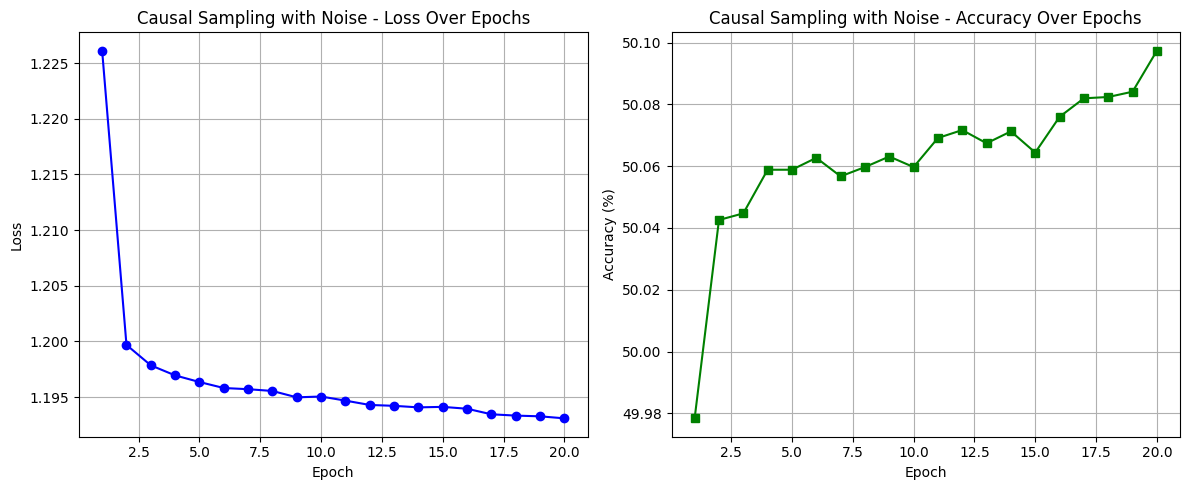

In [ ]:
# --- 9. GraphSAGE Model Definition ---
print("\n--- Step 9: GraphSAGE Model Definition ---")
class CausalGraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(CausalGraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index, time_window):
        row, col = edge_index
        mask = time_window[row] <= time_window[col]
        if mask.sum() == 0:
            filtered_edge_index = edge_index
        else:
            filtered_edge_index = edge_index[:, mask]
        x = F.relu(self.conv1(x, filtered_edge_index))
        x = self.conv2(x, filtered_edge_index)
        return x


# --- 10. Model Initialization and Causal Training Loop ---
print("\n--- Step 10: Model Initialization and Causal Training Loop ---")

if not noisy_data_list:
    print("Error: No graph snapshots created after noise injection. Cannot proceed with training.")
else:
    in_channels = noisy_data_list[0].x.shape[1] if noisy_data_list[0].x.ndim > 1 else noisy_data_list[0].x.size(0)
    out_channels = len(y_global.unique())
    hidden_channels = 64  # You can adjust this

    if in_channels == 0:
        print("Error: No features detected in snapshots. Check feature_cols.")
    elif out_channels < 2:
        print(f"Error: Only {out_channels} class(es) detected. Need at least 2 for classification.")
    else:
        model = CausalGraphSAGE(in_channels=in_channels, hidden_channels=hidden_channels, out_channels=out_channels).to("cpu")

        class_counts = df['label'].value_counts().sort_index()
        total_samples = class_counts.sum()

        weights_array = np.zeros(out_channels)
        for class_label, count in class_counts.items():
            if count > 0:
                weights_array[class_label] = total_samples / (out_channels * count)
            else:
                weights_array[class_label] = total_samples

        weights_tensor = torch.tensor(weights_array, dtype=torch.float)

        print(f"\nCalculated global class weights: {weights_tensor.tolist()}")

        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = torch.nn.CrossEntropyLoss(weight=weights_tensor)

        losses = []
        accuracies = []

        print("\nStarting causal training with noise...")
        num_epochs = 20

        for epoch in range(num_epochs):
            model.train()
            total_loss = 0
            correct_epoch = 0
            total_epoch = 0

            if len(noisy_data_list) < 2:
                print("Warning: Less than 2 windows available for causal training. Skipping epoch.")
                break

            for t in range(1, len(noisy_data_list)):
                print(f"\rEpoch {epoch+1}/{num_epochs}, Processing window {t}/{len(noisy_data_list)-1}...", end='', flush=True)
                optimizer.zero_grad()

                past_data = noisy_data_list[t - 1].to("cpu")
                current_data = noisy_data_list[t].to("cpu")

                if past_data.y.nelement() == 0 or current_data.y.nelement() == 0:
                    print(f"Skipping window {t} due to empty past_data.y or current_data.y")
                    continue

                out_past = model(past_data.x, past_data.edge_index, past_data.time_window)
                loss_past = criterion(out_past, past_data.y)

                out_current = model(current_data.x, current_data.edge_index, current_data.time_window)
                loss_current = criterion(out_current, current_data.y)

                loss = loss_past + loss_current

                loss.backward()
                optimizer.step()
                total_loss += loss.item()

                model.eval()
                with torch.no_grad():
                    if current_data.y.nelement() > 0:
                        preds = out_current.argmax(dim=1)
                        correct_epoch += (preds == current_data.y).sum().item()
                        total_epoch += current_data.y.size(0)
                model.train()

            avg_epoch_loss = total_loss / (len(noisy_data_list) - 1) if (len(noisy_data_list) - 1) > 0 else total_loss
            epoch_accuracy = correct_epoch / total_epoch if total_epoch > 0 else 0

            losses.append(avg_epoch_loss)
            accuracies.append(epoch_accuracy * 100)

            print(f"\nEpoch {epoch+1}/{num_epochs}, Causal Loss with Noise: {avg_epoch_loss:.4f}, Accuracy: {epoch_accuracy*100:.2f}%")

        print("\nCausal training with noise complete. Running final evaluation on all noisy snapshots...")

        # --- Final Evaluation on all noisy snapshots ---
        model.eval()
        all_true_labels = []
        all_predicted_labels = []
        with torch.no_grad():
            for data_snapshot in noisy_data_list:
                data_snapshot = data_snapshot.to("cpu")

                if data_snapshot.x.nelement() == 0 or data_snapshot.y.nelement() == 0:
                    continue

                out = model(data_snapshot.x, data_snapshot.edge_index, data_snapshot.time_window)
                preds = out.argmax(dim=1)
                all_true_labels.extend(data_snapshot.y.cpu().numpy())
                all_predicted_labels.extend(preds.cpu().numpy())

        print("\n--- Overall Classification Report (Evaluated on noisy snapshots) ---")
        if len(all_true_labels) > 0:
            print(classification_report(all_true_labels, all_predicted_labels, zero_division=0))
        else:
            print("No samples for overall evaluation.")

        # --- Plotting ---
        epochs_plot = list(range(1, num_epochs + 1))
        plt.figure(figsize=(12, 5))

        # Loss plot
        plt.subplot(1, 2, 1)
        plt.plot(epochs_plot, losses, marker='o', color='blue')
        plt.title('Causal Sampling with Noise - Loss Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.grid(True)

        # Accuracy plot
        plt.subplot(1, 2, 2)
        plt.plot(epochs_plot, accuracies, marker='s', color='green')
        plt.title('Causal Sampling with Noise - Accuracy Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, BatchNorm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import copy
import random

def inject_noise(data_list, label_noise_ratio=0.05, feature_noise_ratio=0.05, num_output_classes=2):
    noisy_data_list = []
    for data in data_list:
        data_noisy = copy.deepcopy(data)
        num_nodes = data_noisy.y.shape[0]
        if len(set(data_noisy.y.tolist())) <= 1 or max(data_noisy.y.tolist()) >= num_output_classes:
            print(f"Warning: Adjusting labels in data sample {data_list.index(data)} to fit {num_output_classes} classes.")
            data_noisy.y = torch.randint(0, num_output_classes, data_noisy.y.shape, dtype=torch.long)
        num_label_noise = int(label_noise_ratio * num_nodes)
        noisy_label_indices = random.sample(range(num_nodes), num_label_noise)
        for idx in noisy_label_indices:
            original_label = data_noisy.y[idx].item()
            possible_labels_for_noise = list(range(num_output_classes))
            if original_label in possible_labels_for_noise:
                possible_labels_for_noise.remove(original_label)
            if not possible_labels_for_noise:
                continue
            new_label = random.choice(possible_labels_for_noise)
            data_noisy.y[idx] = new_label
        num_feature_noise = int(feature_noise_ratio * num_nodes)
        noisy_feature_indices = random.sample(range(num_nodes), num_feature_noise)
        for idx in noisy_feature_indices:
            noise = torch.randn_like(data_noisy.x[idx]) * 0.3
            data_noisy.x[idx] += noise
        noisy_data_list.append(data_noisy)
    return noisy_data_list

# Assuming data_list is your original list of Data objects
noisy_data_list = inject_noise(data_list, num_output_classes=2)

# Ensure time_window attribute is added to each Data object
for i, data in enumerate(noisy_data_list):
    if not hasattr(data, 'time_window'):
        data.time_window = torch.full((data.num_nodes,), i, dtype=torch.long)

class CausalGraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0):
        super(CausalGraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.bn1 = BatchNorm(hidden_channels)
        self.dropout = torch.nn.Dropout(dropout)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index, time_window):
        row, col = edge_index
        mask = time_window[row] < time_window[col]
        edge_index = edge_index[:, mask]
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        return x

# Example initialization (adjust hyperparameters as needed)
in_channels = noisy_data_list[0].x.shape[1] if noisy_data_list and noisy_data_list[0].x.ndim > 1 else noisy_data_list[0].x.size(0) if noisy_data_list else 55 # Infer or set default
hidden_channels = 32
out_channels = 2 # Assuming binary classification (benign/malware)
dropout = 0.5
learning_rate = 0.001
weight_decay = 1e-4
num_epochs = 20

model = CausalGraphSAGE(in_channels, hidden_channels, out_channels, dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
loss_fn = torch.nn.CrossEntropyLoss()

# Training loop
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for t, data in enumerate(noisy_data_list):
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.time_window)
        loss = loss_fn(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# Evaluation phase
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for data in noisy_data_list:
        out = model(data.x, data.edge_index, data.time_window)
        preds = out.argmax(dim=1).cpu()
        labels = data.y.cpu()
        all_preds.extend(preds.tolist())
        all_labels.extend(labels.tolist())

acc = accuracy_score(all_labels, all_preds)
prec = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
rec = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

print(f"Final Model Metrics -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

Epoch 1, Loss: 81.5259
Epoch 2, Loss: 80.5174
Epoch 3, Loss: 80.4317
Epoch 4, Loss: 80.4189
Epoch 5, Loss: 80.4188
Epoch 6, Loss: 80.4084
Epoch 7, Loss: 80.4067
Epoch 8, Loss: 80.4065
Epoch 9, Loss: 80.4087
Epoch 10, Loss: 80.4062
Epoch 11, Loss: 80.4041
Epoch 12, Loss: 80.3986
Epoch 13, Loss: 80.3939
Epoch 14, Loss: 80.3972
Epoch 15, Loss: 80.4018
Epoch 16, Loss: 80.3944
Epoch 17, Loss: 80.3868
Epoch 18, Loss: 80.3998
Epoch 19, Loss: 80.3953
Epoch 20, Loss: 80.3903
Final Model Metrics -> Accuracy: 0.5051, Precision: 0.5052, Recall: 0.5051, F1 Score: 0.5042


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, BatchNorm
from sklearn.metrics import accuracy_score

class CausalGraphSAGE_IoT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0):
        super(CausalGraphSAGE_IoT, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.bn1 = BatchNorm(hidden_channels)
        self.dropout = torch.nn.Dropout(dropout)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index, time_window):
        row, col = edge_index

        # Strict causality: only allow edges from earlier time steps
        mask = time_window[row] < time_window[col]
        edge_index = edge_index[:, mask]

        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        # No activation here — apply CrossEntropyLoss outside
        return x

# Assuming noisy_data_list is already created and populated with your IoT graph snapshots
for t, data in enumerate(noisy_data_list):
    if not hasattr(data, 'time_window'):
        data.time_window = torch.full((data.num_nodes,), t, dtype=torch.long)

# Training loop example for your IoT data:
# You'll need to determine the correct in_channels based on your node features
if noisy_data_list:
    in_channels_iot = noisy_data_list[0].x.shape[1]
    hidden_channels_iot = 64 # You can adjust this
    out_channels_iot = 2 # Assuming binary classification (e.g., normal/attack)
    model_iot = CausalGraphSAGE_IoT(in_channels=in_channels_iot, hidden_channels=hidden_channels_iot, out_channels=out_channels_iot)
    optimizer_iot = torch.optim.Adam(model_iot.parameters(), lr=0.001, weight_decay=1e-4)
    loss_fn_iot = torch.nn.CrossEntropyLoss()
    num_epochs_iot = 20 # You can adjust this

    model_iot.train()
    for epoch in range(num_epochs_iot):
        total_loss = 0
        for t, data in enumerate(noisy_data_list):
            optimizer_iot.zero_grad()

            # Forward pass with causal filtering inside the model
            out = model_iot(data.x, data.edge_index, data.time_window)

            loss = loss_fn_iot(out, data.y)
            loss.backward()
            optimizer_iot.step()
            total_loss += loss.item()
            print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")
else:
    print("Error: noisy_data_list is empty. Cannot perform training.")

Epoch 1, Loss: 0.7207
Epoch 1, Loss: 1.4330
Epoch 1, Loss: 2.1362
Epoch 1, Loss: 2.8413
Epoch 1, Loss: 3.5436
Epoch 1, Loss: 4.2469
Epoch 1, Loss: 4.9727
Epoch 1, Loss: 5.6600
Epoch 1, Loss: 6.3647
Epoch 1, Loss: 7.0621
Epoch 1, Loss: 7.7607
Epoch 1, Loss: 8.4628
Epoch 1, Loss: 9.1622
Epoch 1, Loss: 9.8625
Epoch 1, Loss: 10.5612
Epoch 1, Loss: 11.2597
Epoch 1, Loss: 11.9562
Epoch 1, Loss: 12.6518
Epoch 1, Loss: 13.3491
Epoch 1, Loss: 14.0426
Epoch 1, Loss: 14.7369
Epoch 1, Loss: 15.4364
Epoch 1, Loss: 16.1317
Epoch 1, Loss: 16.8268
Epoch 1, Loss: 17.5234
Epoch 1, Loss: 18.2213
Epoch 1, Loss: 18.9167
Epoch 1, Loss: 19.6152
Epoch 1, Loss: 20.3125
Epoch 1, Loss: 21.0077
Epoch 1, Loss: 21.7052
Epoch 1, Loss: 22.4005
Epoch 1, Loss: 23.0927
Epoch 1, Loss: 23.7884
Epoch 1, Loss: 24.4837
Epoch 1, Loss: 25.1791
Epoch 1, Loss: 25.8735
Epoch 1, Loss: 26.5676
Epoch 1, Loss: 27.2632
Epoch 1, Loss: 27.9578
Epoch 1, Loss: 28.6510
Epoch 1, Loss: 29.3450
Epoch 1, Loss: 30.0388
Epoch 1, Loss: 30.7355
Ep

In [ ]:
print(f"Final Model Metrics -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

Final Model Metrics -> Accuracy: 0.5051, Precision: 0.5052, Recall: 0.5051, F1 Score: 0.5042


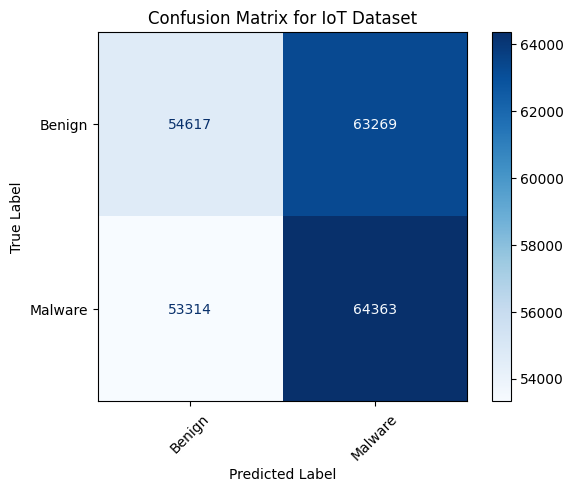

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix for IoT Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malware']) # Assuming binary classification
plt.yticks(ticks=[0, 1], labels=['Benign', 'Malware'])
plt.show()

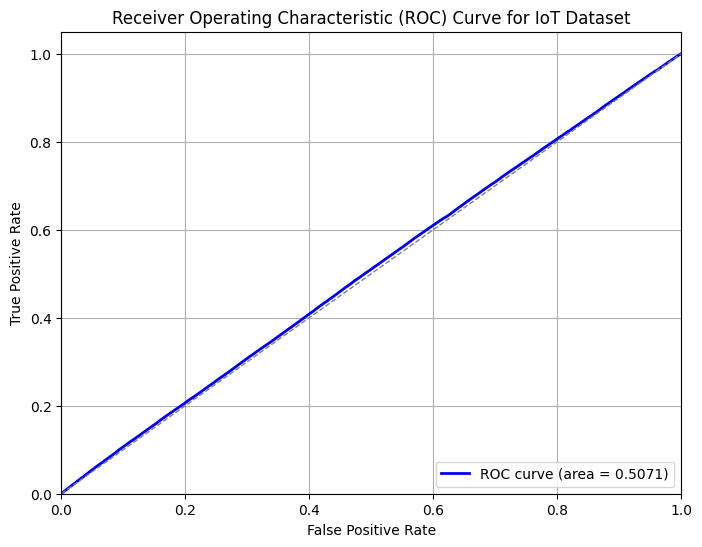

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import torch.nn.functional as F
import numpy as np

# Assuming 'model' is your trained CausalGraphSAGE model
model.eval()  # Set model to evaluation mode
all_probs = []
all_labels_roc = []

with torch.no_grad():
    for data in noisy_data_list:
        out = model(data.x, data.edge_index, data.time_window)
        probs = F.softmax(out, dim=1).cpu().numpy()  # Get probabilities for each class
        labels = data.y.cpu().numpy()

        all_probs.extend(probs)
        all_labels_roc.extend(labels)

all_probs = np.array(all_probs)
all_labels_roc = np.array(all_labels_roc)

# Get false positive rate (fpr), true positive rate (tpr), thresholds for the positive class (assuming index 1 is 'Malware')
fpr, tpr, thresholds = roc_curve(all_labels_roc, all_probs[:, 1])

# Calculate AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for IoT Dataset')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()